<a href="https://colab.research.google.com/github/f8sle/report/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC20250613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **기말고사(20250613)**
학번 : 2020140008             
성명 : 박성훈

# **문제 1) ANN Backpropagation**

In [3]:
# Back-propagation of ANN with numpy
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(0)
num_samples = 300

x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)

# Target
y = 3 * x1 - 2 * x2 + x3

In [4]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# MSE and MAPE functions
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

# Data Generation
np.random.seed(0)
num_samples = 300
x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)
X = np.vstack((x1, x2, x3)).T
y = (3 * x1 - 2 * x2 + x3).reshape(-1, 1)

# ANN Architecture
input_size = 3
hidden_size = 10
output_size = 1

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Hyperparameters
learning_rate = 0.001
epochs = 100

# Training
mse_history = []
mape_history = []

for epoch in range(epochs):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = z2  # Linear activation for output (since it's a regression problem)

    # Compute loss
    mse_loss = mse(y, a2)
    mape_loss = mape(y, a2)
    mse_history.append(mse_loss)
    mape_history.append(mape_loss)

    # Backward propagation
    error_output = a2 - y
    delta_output = error_output  # Derivative of linear activation is 1

    error_hidden = np.dot(delta_output, W2.T)
    delta_hidden = error_hidden * sigmoid_derivative(a1)

    # Update weights and biases
    W2 -= learning_rate * np.dot(a1.T, delta_output)
    b2 -= learning_rate * np.sum(delta_output, axis=0, keepdims=True)
    W1 -= learning_rate * np.dot(X.T, delta_hidden)
    b1 -= learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, MSE: {mse_loss:.4f}, MAPE: {mape_loss:.4f}%")

# Final evaluation
print("\nFinal Results:")
print(f"Final MSE: {mse_history[-1]:.4f}")
print(f"Final MAPE: {mape_history[-1]:.4f}%")

# Optional: Plotting the loss history
"""
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mse_history)
plt.title('MSE Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.subplot(1, 2, 2)
plt.plot(mape_history)
plt.title('MAPE Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAPE (%)')
plt.show()
"""

Epoch 10/100, MSE: 1.1920, MAPE: 304.5244%
Epoch 20/100, MSE: 1.1836, MAPE: 304.4806%
Epoch 30/100, MSE: 1.1745, MAPE: 304.3345%
Epoch 40/100, MSE: 1.1641, MAPE: 304.0253%
Epoch 50/100, MSE: 1.1517, MAPE: 303.4814%
Epoch 60/100, MSE: 1.1367, MAPE: 302.6201%
Epoch 70/100, MSE: 1.1183, MAPE: 301.3343%
Epoch 80/100, MSE: 1.0956, MAPE: 299.4881%
Epoch 90/100, MSE: 1.0677, MAPE: 296.9188%
Epoch 100/100, MSE: 1.0336, MAPE: 293.4314%

Final Results:
Final MSE: 1.0336
Final MAPE: 293.4314%


"\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(12, 5))\nplt.subplot(1, 2, 1)\nplt.plot(mse_history)\nplt.title('MSE Loss over Epochs')\nplt.xlabel('Epoch')\nplt.ylabel('MSE')\nplt.subplot(1, 2, 2)\nplt.plot(mape_history)\nplt.title('MAPE Loss over Epochs')\nplt.xlabel('Epoch')\nplt.ylabel('MAPE (%)')\nplt.show()\n"

# **문제 2) CNN**
- Data
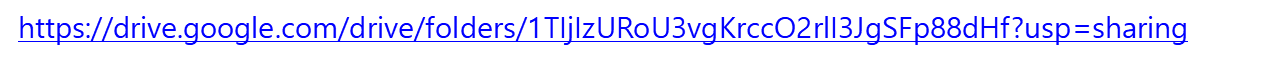

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 0,1,2,3,4, and 5 finger image data set

train_x = np.load('/content/drive/MyDrive/Finger_train_img.npy')
train_y = np.load('/content/drive/MyDrive/Finger_train_label.npy')

test_x = np.load('/content/drive/MyDrive/Finger_test_img.npy')
test_y = np.load('/content/drive/MyDrive/Finger_test_label.npy')

# **문제 3) K-means clustering**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data1 = np.array((np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100)))
data2 = np.array((np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100)))
data3 = np.array((np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100)))
data4 = np.array((np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100)))